In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
print(cancer_data.keys())
print(cancer_data.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

In [4]:
df = pd.DataFrame(cancer_data['data'],columns=cancer_data['feature_names'])
df.shape

(569, 30)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PCA 

### Step 1. Data standardization
We have to standardize/scale data before appliying PCA or Tsne , 
Because by doing so data varies from 0 to 1 ( mean 0 and variance 1)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


### Step 2. PCA

PCA with sklearn uses a very similar process to other preprocessing function that comes with sklearn. 
1. We instantiate a PCA Object
2. Find Principal components using fit method
3. Apply the rotation and dimensionality reduction by calling transform()
4. We can also specify number of principal components we want to create

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None) #we want to convert 30 dimension to 2 dimension 

pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
# Now transforming data to first 2 principal components

x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)
print(pca.explained_variance_ratio_) 
print(np.cumsum(pca.explained_variance_ratio_)) #Decide number of principle components to consider based on variations you are getting for each feature.

# We have reduced 30 feature to 2 feature

(569, 30)
(569, 30)
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


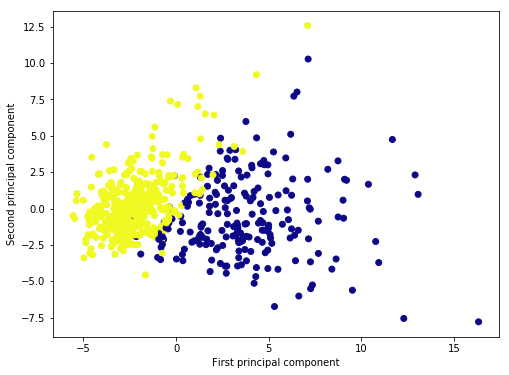

In [38]:

# PCA visualization
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=cancer_data['target'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()